<a href="https://colab.research.google.com/github/iecsh10/IT_reno/blob/main/IT%EC%99%80_%EB%B9%84%EC%A6%88%EB%8B%88%EC%8A%A4_%ED%98%81%EC%8B%A0_10%EC%A1%B0_%ED%95%9C%EB%B6%80%EB%AA%A8_%EC%9E%90%EB%85%80_%EB%8F%8C%EB%B4%84_%EC%84%9C%EB%B9%84%EC%8A%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
##데이터 불러오기 
df1=pd.read_csv("https://raw.githubusercontent.com/iecsh10/IT_reno/main/%ED%95%9C%EB%B6%80%EB%AA%A8%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%9B%90%EB%B3%B8%20%EC%88%98%EC%A0%95%EB%B3%B8.csv"
            ,encoding="cp949")


In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns           # Seaborn 로딩하기
import matplotlib.pyplot as plt # Matplotlib의 pyplot 로딩하기

In [4]:
#한글 깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


#설치하고 다시 돌려줘야 함
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [5]:
#설치하고 다시 돌려줘야 함
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

## 모델 1 

In [6]:

df0=df1.iloc[:,[0
              ,191,192,7,195
                ,276,300
                ,388,392,393]]
df0=df0.dropna()

X = df0.iloc[:, 1:]
y = df0.iloc[:, 0] 

#print (len(X))



In [7]:
###의사결정나무
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# 데이터셋을 학습(train)과 테스트(test) 세트로 분할
#random_state : random 으로 분할시 사용되는 난수 seed 숫자
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=0)

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

tree= DecisionTreeClassifier(max_depth=5,random_state=0)  
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))


print(y_test.value_counts()) 


학습용 데이터 정확도: 0.721
시험용 데이터 정확도: 0.619
2    147
1    131
Name: 미취학&초등생 자녀가 평일 혼자 지내는 시간, dtype: int64


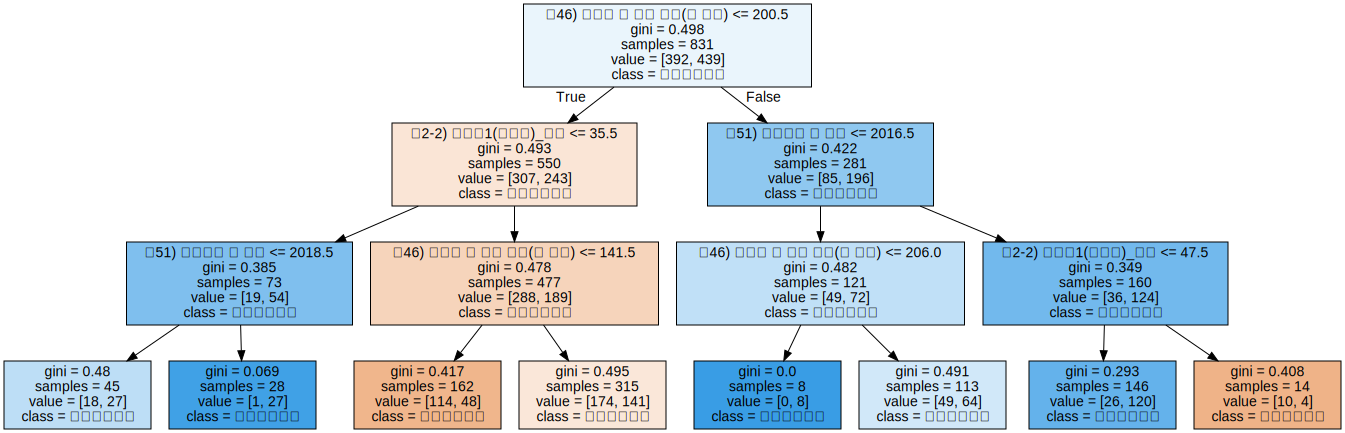

In [8]:
#graphviz 라이브러리를 이용하여 의사결정나무 그리기 
from sklearn.tree import export_graphviz
import graphviz

tree2 = DecisionTreeClassifier(max_depth=3,random_state=0)  
tree2.fit(X_train, y_train)

# filled = True: 색상의 진하기로 클래스를 나타냄, impurity: 불순도 계산값 보여주기 옵션
export_graphviz(tree2, out_file="tree.dot", class_names=["돌봄시간있음","돌봄시간없음" ],
                feature_names=df0.columns[1:], impurity=True, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))



In [9]:
###랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=45, random_state=0)
forest.fit(X_train, y_train)
print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.999
시험용 데이터 세트 정확도: 0.658


Accuracy
Decision tree:  [0.67857143 0.56626506 0.59036145 0.65060241 0.6626506  0.62650602
 0.59036145 0.63855422 0.6746988  0.62650602]
Random forest:  [0.66666667 0.62650602 0.69879518 0.63855422 0.5060241  0.57831325
 0.57831325 0.65060241 0.63855422 0.61445783]
Accuracy mean
Decision tree :0.631
Random forest :0.620


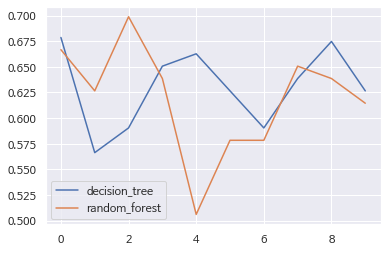

In [10]:
from sklearn.model_selection import cross_val_score

# 교차 검증을 10번 수행하여 10번의 교차 검증 평균 정확도를 비교 (10-fold cross validation)
# default cv=5

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 

cv_list = [    
            ['decision_tree',dt_scores],
            ['random_forest',rf_scores],
          ]
df = pd.DataFrame.from_dict(dict(cv_list))
df.plot()

In [11]:
from sklearn.ensemble import GradientBoostingClassifier
# 기본값은 max_depth= 3, n_estimators=100, learning_rate = 0.1

gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)
print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))


gbrt = GradientBoostingClassifier(random_state=0,learning_rate=0.1)
gbrt.fit(X_train, y_train)
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))


학습 데이터 세트 정확도: 0.702
시험용 데이터 세트 정확도: 0.662
학습용 데이터 세트 정확도: 0.793
시험용 데이터 세트 정확도: 0.694


In [12]:

###그리드서치

from sklearn.model_selection import GridSearchCV

# 파라미터를 dictionary 형태로 설정
parameters = {'max_depth':[1,2,3], 'learning_rate':[0.1,0.08, 0.06, 0.04, 0.02]}

# param_grid의 파라미터들을 3개의 fold 로 나누어 검증
# refit=True (기본값): 가장 좋은 파라미터 설정으로 재학습  
init_gbrt = GradientBoostingClassifier(random_state=0)
grid_gbrt = GridSearchCV(init_gbrt, param_grid=parameters, cv=3, refit=True)
print(grid_gbrt)
# 파라미터들을 순차적으로 학습, 검증
grid_gbrt.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_gbrt.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]



GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.1, 0.08, 0.06, 0.04, 0.02],
                         'max_depth': [1, 2, 3]})


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'learning_rate': 0.1, 'max_depth': 1}",0.630566,12,0.646209,0.574007,0.671480
1,"{'learning_rate': 0.1, 'max_depth': 2}",0.634176,8,0.675090,0.574007,0.653430
2,"{'learning_rate': 0.1, 'max_depth': 3}",0.629362,15,0.646209,0.592058,0.649819
3,"{'learning_rate': 0.08, 'max_depth': 1}",0.629362,14,0.646209,0.577617,0.664260
4,"{'learning_rate': 0.08, 'max_depth': 2}",0.630566,11,0.678700,0.577617,0.635379
5,"{'learning_rate': 0.08, 'max_depth': 3}",0.636582,6,0.660650,0.599278,0.649819
6,"{'learning_rate': 0.06, 'max_depth': 1}",0.640193,2,0.660650,0.584838,0.675090
7,"{'learning_rate': 0.06, 'max_depth': 2}",0.637786,5,0.671480,0.577617,0.664260
8,"{'learning_rate': 0.06, 'max_depth': 3}",0.630566,13,0.649819,0.592058,0.649819
9,"{'learning_rate': 0.04, 'max_depth': 1}",0.638989,4,0.653430,0.599278,0.664260


In [13]:
print('GridSearchCV 최적 파라미터:', grid_gbrt.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_gbrt.best_score_))

# 최적 파라미터로 학습이 된 모델을 이용하여 시험용 데이터 세트 분류

print("학습용 데이터 세트 정확도: {:.3f}".format(grid_gbrt.score(X_train, y_train)))

print("시험용 데이터 세트 정확도: {:.3f}".format(grid_gbrt.score(X_test, y_test)))

GridSearchCV 최적 파라미터: {'learning_rate': 0.02, 'max_depth': 2}
GridSearchCV 최고 정확도: 0.6486
학습용 데이터 세트 정확도: 0.690
시험용 데이터 세트 정확도: 0.694


In [14]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3,random_state=0)
xgb.fit(X_train, y_train)
y_preds = xgb.predict(X_test)

#성능 평가
print("학습용 데이터 세트 정확도: {:.3f}".format(xgb.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(xgb.score(X_test, y_test)))


xgb_pred = xgb.predict(X_test)
print('XG boosting 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, xgb_pred)))
print(confusion_matrix(y_test, xgb_pred))


학습용 데이터 세트 정확도: 0.767
시험용 데이터 세트 정확도: 0.669
XG boosting 시험용 데이터 세트 정확도:0.669
[[ 82  49]
 [ 43 104]]


In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix 

print(y_test.value_counts()) 


tree= DecisionTreeClassifier(max_depth=6,random_state=0)  
tree.fit(X_train, y_train)


dt_pred = tree.predict(X_test)
rf_pred = forest.predict(X_test)
grid_gbrt_pred = grid_gbrt.predict(X_test)
gbrt_pred = gbrt.predict(X_test)
xgb_pred = xgb.predict(X_test)



# 예측 결과인 pred와 실제 결과인 y_test의 Confusion Matrix 출력

print('Decision tree 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, dt_pred)))
print(confusion_matrix(y_test, dt_pred))
print('Random forest 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, rf_pred)))
print(confusion_matrix(y_test, rf_pred))
print('Gradient boosting 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, gbrt_pred)))
print(confusion_matrix(y_test, gbrt_pred))
print('Gradient boosting(그리드서치) 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, grid_gbrt_pred)))
print(confusion_matrix(y_test, grid_gbrt_pred))
print('XG boosting 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, xgb_pred)))
print(confusion_matrix(y_test, xgb_pred))


2    147
1    131
Name: 미취학&초등생 자녀가 평일 혼자 지내는 시간, dtype: int64
Decision tree 시험용 데이터 세트 정확도:0.622
[[91 40]
 [65 82]]
Random forest 시험용 데이터 세트 정확도:0.658
[[ 83  48]
 [ 47 100]]
Gradient boosting 시험용 데이터 세트 정확도:0.694
[[ 87  44]
 [ 41 106]]
Gradient boosting(그리드서치) 시험용 데이터 세트 정확도:0.694
[[ 88  43]
 [ 42 105]]
XG boosting 시험용 데이터 세트 정확도:0.669
[[ 82  49]
 [ 43 104]]


In [16]:
import numpy as np

def plot_feature_importances_single(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(df0.columns[1:])   
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), df0.columns[1:])   
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) #Y 축 범위 지정 


##변수의 중요도##

print(X.columns)
result = xgb.feature_importances_
print("변수의 중요도:\n", result)

Index(['문27) ① 주업_시작시간', '문27) ① 주업_종료시간', '문2-2) 가구원1(가구주)_연령',
       '문28) 월평균 개인 근로/사업 소득', '문46) 가구의 월 평균 지출(⑫ 총액)', '문51) 한부모가 된 시기',
       '한부모학력', '종사상지위', '정부지원유형'],
      dtype='object')
변수의 중요도:
 [0.08175206 0.15236807 0.14463733 0.07641122 0.17916277 0.12390961
 0.09158755 0.09501533 0.055156  ]


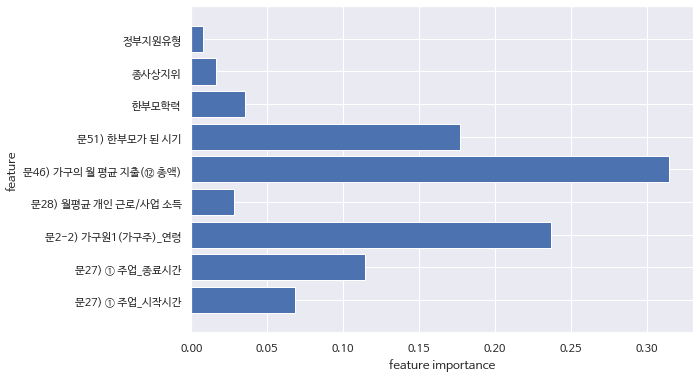

In [17]:
plot_feature_importances_single(gbrt)

## 모델 2 

### 초등학생 _ 변화


In [18]:
df0=df1.iloc[:,[0
                ,82,83,84,85,86,87]]

df0.replace(8,np.nan,inplace=True)
df0=df0.dropna()

X = df0.iloc[:, 1:]
y = df0.iloc[:, 0] 

print (len(X))

print(df0.columns)

y.value_counts()

503
Index(['미취학&초등생 자녀가 평일 혼자 지내는 시간', '문10) 한부모가 된 후 초등학생 자녀의 변화정도(① 학교성적)',
       '문10) 한부모가 된 후 초등학생 자녀의 변화정도(② 자녀와 나의 관계)',
       '문10) 한부모가 된 후 초등학생 자녀의 변화정도(③ 자녀와 친척 관계)',
       '문10) 한부모가 된 후 초등학생 자녀의 변화정도(④ 자녀와 친구 관계)',
       '문10) 한부모가 된 후 초등학생 자녀의 변화정도(⑤ 일상생활 태도)',
       '문10) 한부모가 된 후 초등학생 자녀의 변화정도(⑥ 학교생활 태도)'],
      dtype='object')


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


1    260
2    243
Name: 미취학&초등생 자녀가 평일 혼자 지내는 시간, dtype: int64

In [19]:
print(df0.iloc[:,1].unique())


[4. 3. 2. 5. 1.]


In [20]:
###의사결정나무
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# 데이터셋을 학습(train)과 테스트(test) 세트로 분할
#random_state : random 으로 분할시 사용되는 난수 seed 숫자
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=0)

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

tree= DecisionTreeClassifier(max_depth=6,random_state=0)  
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))


print(y_test.value_counts()) 


학습용 데이터 정확도: 0.674
시험용 데이터 정확도: 0.563
1    65
2    61
Name: 미취학&초등생 자녀가 평일 혼자 지내는 시간, dtype: int64


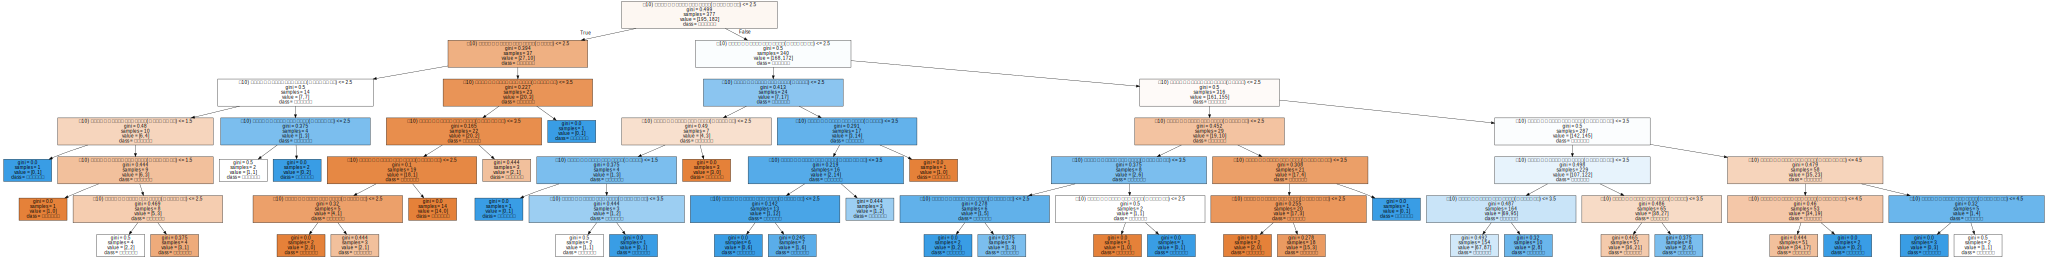

In [21]:
#graphviz 라이브러리를 이용하여 의사결정나무 그리기 
from sklearn.tree import export_graphviz
import graphviz

tree2 = DecisionTreeClassifier(max_depth=6,random_state=0)  
tree2.fit(X_train, y_train)

# filled = True: 색상의 진하기로 클래스를 나타냄, impurity: 불순도 계산값 보여주기 옵션
export_graphviz(tree2, out_file="tree.dot", class_names=["돌봄시간있음","돌봄시간없음" ],
                feature_names=df0.columns[1:], impurity=True, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))



In [22]:
###랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=20, random_state=0)
forest.fit(X_train, y_train)
print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.716
시험용 데이터 세트 정확도: 0.603


Accuracy
Decision tree:  [0.57894737 0.52631579 0.60526316 0.63157895 0.55263158 0.57894737
 0.71052632 0.56756757 0.59459459 0.54054054]
Random forest:  [0.52631579 0.60526316 0.68421053 0.55263158 0.5        0.5
 0.73684211 0.45945946 0.72972973 0.56756757]
Accuracy mean
Decision tree :0.589
Random forest :0.586


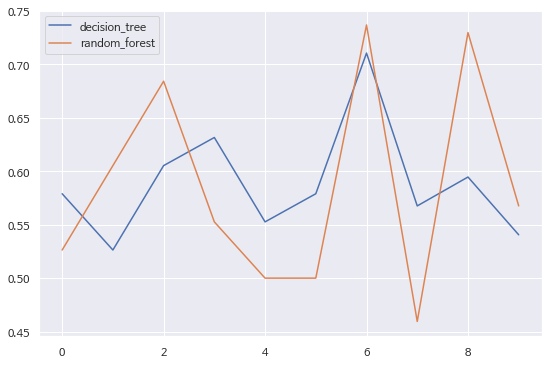

In [23]:
from sklearn.model_selection import cross_val_score

# 교차 검증을 10번 수행하여 10번의 교차 검증 평균 정확도를 비교 (10-fold cross validation)
# default cv=5

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 

cv_list = [    
            ['decision_tree',dt_scores],
            ['random_forest',rf_scores],
          ]
df = pd.DataFrame.from_dict(dict(cv_list))
df.plot()

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
# 기본값은 max_depth= 3, n_estimators=100, learning_rate = 0.1

gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)
print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))


gbrt = GradientBoostingClassifier(random_state=0,learning_rate=0.1)
gbrt.fit(X_train, y_train)
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))


학습 데이터 세트 정확도: 0.653
시험용 데이터 세트 정확도: 0.571
학습용 데이터 세트 정확도: 0.703
시험용 데이터 세트 정확도: 0.627


In [25]:

###그리드서치

from sklearn.model_selection import GridSearchCV

# 파라미터를 dictionary 형태로 설정
parameters = {'max_depth':[1,2,3], 'learning_rate':[0.1,0.08, 0.06, 0.04, 0.02]}

# param_grid의 파라미터들을 3개의 fold 로 나누어 검증
# refit=True (기본값): 가장 좋은 파라미터 설정으로 재학습  
init_gbrt = GradientBoostingClassifier(random_state=0)
grid_gbrt = GridSearchCV(init_gbrt, param_grid=parameters, cv=3, refit=True)
print(grid_gbrt)
# 파라미터들을 순차적으로 학습, 검증
grid_gbrt.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_gbrt.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]



GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.1, 0.08, 0.06, 0.04, 0.02],
                         'max_depth': [1, 2, 3]})


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'learning_rate': 0.1, 'max_depth': 1}",0.575619,12,0.571429,0.571429,0.584
1,"{'learning_rate': 0.1, 'max_depth': 2}",0.615302,1,0.642857,0.619048,0.584
2,"{'learning_rate': 0.1, 'max_depth': 3}",0.612677,2,0.642857,0.603175,0.592
3,"{'learning_rate': 0.08, 'max_depth': 1}",0.580931,10,0.579365,0.571429,0.592
4,"{'learning_rate': 0.08, 'max_depth': 2}",0.604698,6,0.626984,0.611111,0.576
5,"{'learning_rate': 0.08, 'max_depth': 3}",0.607386,4,0.619048,0.611111,0.592
6,"{'learning_rate': 0.06, 'max_depth': 1}",0.578286,11,0.579365,0.563492,0.592
7,"{'learning_rate': 0.06, 'max_depth': 2}",0.596783,7,0.595238,0.611111,0.584
8,"{'learning_rate': 0.06, 'max_depth': 3}",0.604720,5,0.626984,0.603175,0.584
9,"{'learning_rate': 0.04, 'max_depth': 1}",0.548974,14,0.587302,0.547619,0.512


In [26]:
print('GridSearchCV 최적 파라미터:', grid_gbrt.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_gbrt.best_score_))

# 최적 파라미터로 학습이 된 모델을 이용하여 시험용 데이터 세트 분류

print("학습용 데이터 세트 정확도: {:.3f}".format(grid_gbrt.score(X_train, y_train)))

print("시험용 데이터 세트 정확도: {:.3f}".format(grid_gbrt.score(X_test, y_test)))

GridSearchCV 최적 파라미터: {'learning_rate': 0.1, 'max_depth': 2}
GridSearchCV 최고 정확도: 0.6153
학습용 데이터 세트 정확도: 0.671
시험용 데이터 세트 정확도: 0.611


In [27]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3,random_state=0)
xgb.fit(X_train, y_train)
y_preds = xgb.predict(X_test)

#성능 평가
print("학습용 데이터 세트 정확도: {:.3f}".format(xgb.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(xgb.score(X_test, y_test)))


xgb_pred = xgb.predict(X_test)
print('XG boosting 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, xgb_pred)))
print(confusion_matrix(y_test, xgb_pred))



학습용 데이터 세트 정확도: 0.674
시험용 데이터 세트 정확도: 0.571
XG boosting 시험용 데이터 세트 정확도:0.571
[[29 36]
 [18 43]]


In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix 

print(y_test.value_counts()) 


tree= DecisionTreeClassifier(max_depth=4,random_state=0)  
tree.fit(X_train, y_train)


dt_pred = tree.predict(X_test)
rf_pred = forest.predict(X_test)
grid_gbrt_pred = grid_gbrt.predict(X_test)
gbrt_pred = gbrt.predict(X_test)
xgb_pred = xgb.predict(X_test)



# 예측 결과인 pred와 실제 결과인 y_test의 Confusion Matrix 출력

print('Decision tree 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, dt_pred)))
print(confusion_matrix(y_test, dt_pred))
print('Random forest 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, rf_pred)))
print(confusion_matrix(y_test, rf_pred))
print('Gradient boosting 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, gbrt_pred)))
print(confusion_matrix(y_test, gbrt_pred))
print('Gradient boosting(그리드서치) 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, grid_gbrt_pred)))
print(confusion_matrix(y_test, grid_gbrt_pred))
print('XG boosting 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, xgb_pred)))
print(confusion_matrix(y_test, xgb_pred))


1    65
2    61
Name: 미취학&초등생 자녀가 평일 혼자 지내는 시간, dtype: int64
Decision tree 시험용 데이터 세트 정확도:0.516
[[24 41]
 [20 41]]
Random forest 시험용 데이터 세트 정확도:0.603
[[33 32]
 [18 43]]
Gradient boosting 시험용 데이터 세트 정확도:0.627
[[33 32]
 [15 46]]
Gradient boosting(그리드서치) 시험용 데이터 세트 정확도:0.611
[[33 32]
 [17 44]]
XG boosting 시험용 데이터 세트 정확도:0.571
[[29 36]
 [18 43]]


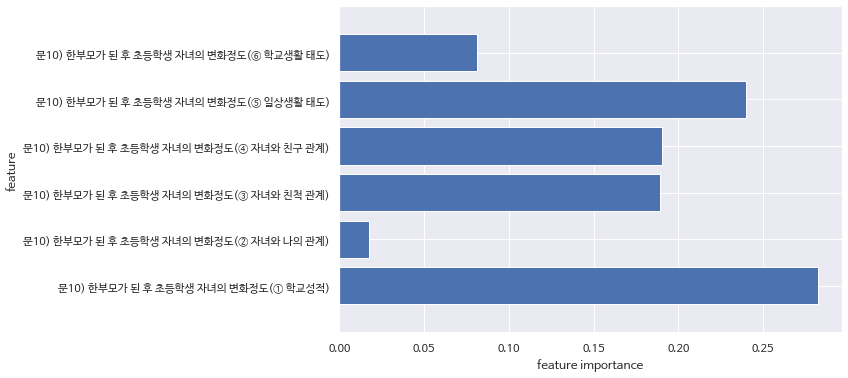

In [29]:
import numpy as np

def plot_feature_importances_single(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(df0.columns[1:])   
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), df0.columns[1:])   
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) #Y 축 범위 지정 

##변수의 중요도 : 의사결정나무 ##

plot_feature_importances_single(tree)

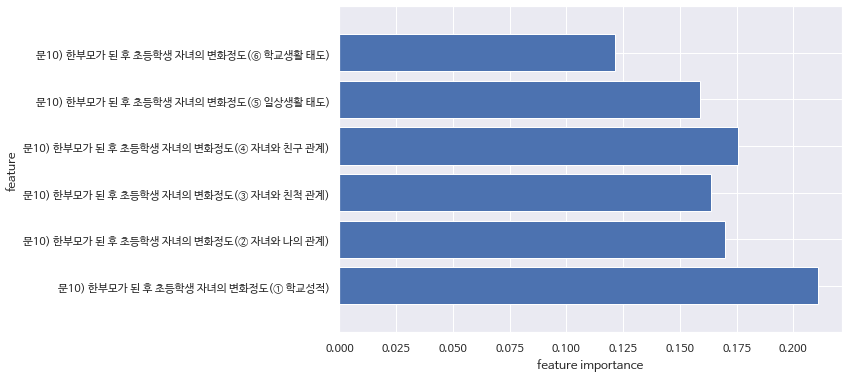

In [30]:
##변수의 중요도 : 랜덤포레스트 ##

plot_feature_importances_single(forest)

Index(['문10) 한부모가 된 후 초등학생 자녀의 변화정도(① 학교성적)',
       '문10) 한부모가 된 후 초등학생 자녀의 변화정도(② 자녀와 나의 관계)',
       '문10) 한부모가 된 후 초등학생 자녀의 변화정도(③ 자녀와 친척 관계)',
       '문10) 한부모가 된 후 초등학생 자녀의 변화정도(④ 자녀와 친구 관계)',
       '문10) 한부모가 된 후 초등학생 자녀의 변화정도(⑤ 일상생활 태도)',
       '문10) 한부모가 된 후 초등학생 자녀의 변화정도(⑥ 학교생활 태도)'],
      dtype='object')
변수의 중요도:
 [0.28783376 0.21139318 0.15483139 0.15163678 0.10502981 0.08927509]


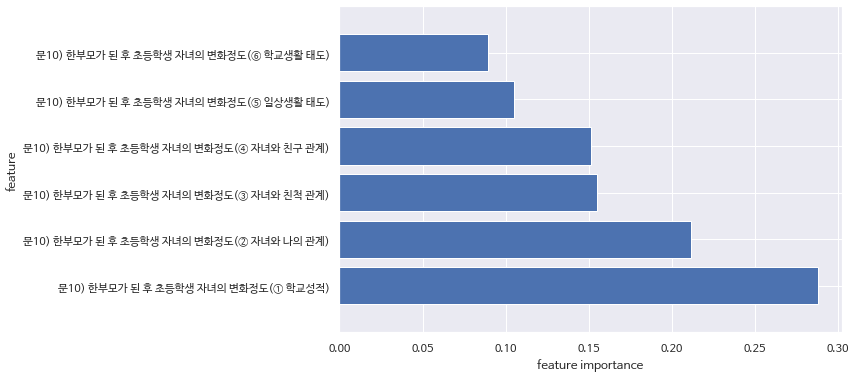

In [31]:

##변수의 중요도 : 그래디언트 부스트 ##

print(X.columns)
result = gbrt.feature_importances_
print("변수의 중요도:\n", result)
plot_feature_importances_single(gbrt)

In [32]:
##변수의 중요도 : XG부스트##

print(X.columns)
result = xgb.feature_importances_
print("변수의 중요도:\n", result)

Index(['문10) 한부모가 된 후 초등학생 자녀의 변화정도(① 학교성적)',
       '문10) 한부모가 된 후 초등학생 자녀의 변화정도(② 자녀와 나의 관계)',
       '문10) 한부모가 된 후 초등학생 자녀의 변화정도(③ 자녀와 친척 관계)',
       '문10) 한부모가 된 후 초등학생 자녀의 변화정도(④ 자녀와 친구 관계)',
       '문10) 한부모가 된 후 초등학생 자녀의 변화정도(⑤ 일상생활 태도)',
       '문10) 한부모가 된 후 초등학생 자녀의 변화정도(⑥ 학교생활 태도)'],
      dtype='object')
변수의 중요도:
 [0.18708254 0.12905699 0.1899136  0.1991909  0.13547951 0.1592765 ]


### 자녀 인터넷 

In [33]:
df0=df1.iloc[:,[0
                ,120,121,122,123,124,125,126,127]]
df0.replace(8,np.nan,inplace=True)

df0=df0.dropna()

X = df0.iloc[:, 1:]
y = df0.iloc[:, 0] 


print (len(X))

print(df0.columns)
print(df0.iloc[:,1].unique())
print(df0.iloc[:,2].unique())
print(df0.iloc[:,3].unique())
print(df0.iloc[:,4].unique())
print(df0.iloc[:,5].unique())
print(df0.iloc[:,6].unique())
print(df0.iloc[:,7].unique())
print(df0.iloc[:,8].unique())

1294
Index(['미취학&초등생 자녀가 평일 혼자 지내는 시간', '문19) 자녀의 인터넷·스마트폰 사용 현황(① 가족과 다툼)',
       '문19) 자녀의 인터넷·스마트폰 사용 현황(② 이용시에만 자신감 보임)',
       '문19) 자녀의 인터넷·스마트폰 사용 현황(③ 폭력적으로 변함)',
       '문19) 자녀의 인터넷·스마트폰 사용 현황(④ 4시간 이상 이용)',
       '문19) 자녀의 인터넷·스마트폰 사용 현황(⑤ 식사, 휴식 없이 이용)',
       '문19) 자녀의 인터넷·스마트폰 사용 현황(⑥ 주변 시선이나 반응에 무관심)',
       '문19) 자녀의 인터넷·스마트폰 사용 현황(⑦ 이용 시 화내거나 짜증)',
       '문19) 자녀의 인터넷·스마트폰 사용 현황(⑧ 하루 이상 밤을 새면서 이용)'],
      dtype='object')
[1. 4. 2. 3. 5.]
[2. 4. 3. 1. 5.]
[2. 3. 4. 1. 5.]
[1. 2. 3. 4. 5.]
[1. 3. 2. 4. 5.]
[1. 3. 4. 2. 5.]
[2. 4. 1. 3. 5.]
[1. 3. 2. 4. 5.]


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


2.0    493
1.0    289
3.0    281
4.0    171
5.0     60
Name: 문19) 자녀의 인터넷·스마트폰 사용 현황(① 가족과 다툼), dtype: int64

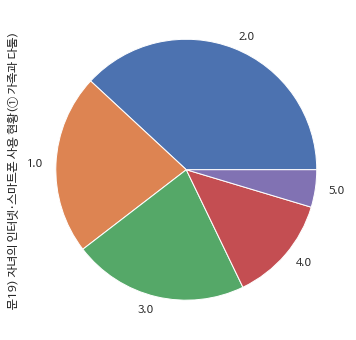

In [34]:
df0.iloc[:,1].value_counts().plot.pie()

df0.iloc[:,1].value_counts()

In [35]:
###의사결정나무
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# 데이터셋을 학습(train)과 테스트(test) 세트로 분할
#random_state : random 으로 분할시 사용되는 난수 seed 숫자
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=0)

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

tree= DecisionTreeClassifier(max_depth=4,random_state=0)  
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))


print(y_test.value_counts()) 


학습용 데이터 정확도: 0.584
시험용 데이터 정확도: 0.580
2    181
1    143
Name: 미취학&초등생 자녀가 평일 혼자 지내는 시간, dtype: int64


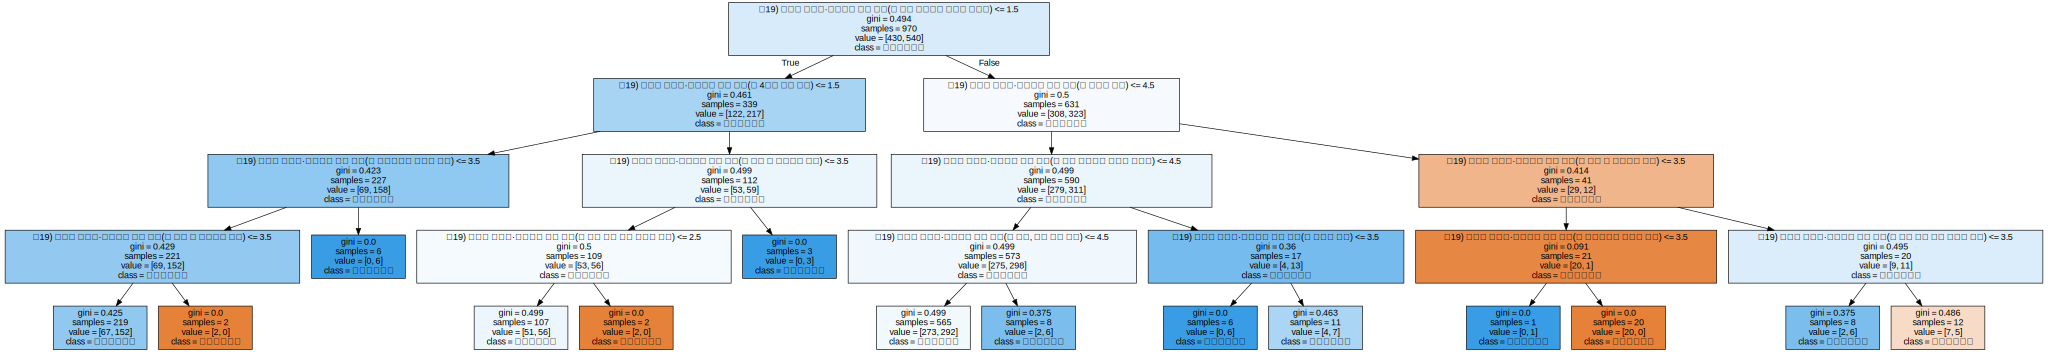

In [36]:
#graphviz 라이브러리를 이용하여 의사결정나무 그리기 
from sklearn.tree import export_graphviz
import graphviz

tree2 = DecisionTreeClassifier(max_depth=4,random_state=0)  
tree2.fit(X_train, y_train)

# filled = True: 색상의 진하기로 클래스를 나타냄, impurity: 불순도 계산값 보여주기 옵션
export_graphviz(tree2, out_file="tree.dot", class_names=["돌봄시간있음","돌봄시간없음" ],
                feature_names=df0.columns[1:], impurity=True, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))



In [37]:
###랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=50, random_state=0)
forest.fit(X_train, y_train)
print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.869
시험용 데이터 세트 정확도: 0.549


Accuracy
Decision tree:  [0.54639175 0.49484536 0.46391753 0.55670103 0.50515464 0.56701031
 0.55670103 0.53608247 0.5257732  0.57731959]
Random forest:  [0.58762887 0.56701031 0.59793814 0.55670103 0.59793814 0.57731959
 0.53608247 0.65979381 0.51546392 0.64948454]
Accuracy mean
Decision tree :0.533
Random forest :0.585


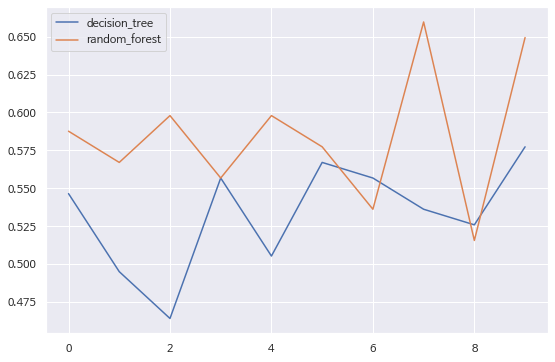

In [38]:
from sklearn.model_selection import cross_val_score

# 교차 검증을 10번 수행하여 10번의 교차 검증 평균 정확도를 비교 (10-fold cross validation)
# default cv=5

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 

cv_list = [    
            ['decision_tree',dt_scores],
            ['random_forest',rf_scores],
          ]
df = pd.DataFrame.from_dict(dict(cv_list))
df.plot()

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
# 기본값은 max_depth= 3, n_estimators=100, learning_rate = 0.1



gbrt = GradientBoostingClassifier(random_state=0,learning_rate=0.1)
gbrt.fit(X_train, y_train)
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)
print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))



학습용 데이터 세트 정확도: 0.697
시험용 데이터 세트 정확도: 0.568
학습 데이터 세트 정확도: 0.594
시험용 데이터 세트 정확도: 0.580


In [40]:

###그리드서치

from sklearn.model_selection import GridSearchCV

# 파라미터를 dictionary 형태로 설정
parameters = {'max_depth':[1,2,3], 'learning_rate':[0.1,0.08, 0.06, 0.04, 0.02]}

# param_grid의 파라미터들을 3개의 fold 로 나누어 검증
# refit=True (기본값): 가장 좋은 파라미터 설정으로 재학습  
init_gbrt = GradientBoostingClassifier(random_state=0)
grid_gbrt = GridSearchCV(init_gbrt, param_grid=parameters, cv=3, refit=True)
print(grid_gbrt)
# 파라미터들을 순차적으로 학습, 검증
grid_gbrt.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_gbrt.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]



GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.1, 0.08, 0.06, 0.04, 0.02],
                         'max_depth': [1, 2, 3]})


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'learning_rate': 0.1, 'max_depth': 1}",0.549443,11,0.589506,0.526316,0.532508
1,"{'learning_rate': 0.1, 'max_depth': 2}",0.545373,13,0.533951,0.557276,0.544892
2,"{'learning_rate': 0.1, 'max_depth': 3}",0.555654,5,0.570988,0.544892,0.551084
3,"{'learning_rate': 0.08, 'max_depth': 1}",0.552565,7,0.564815,0.554180,0.538700
4,"{'learning_rate': 0.08, 'max_depth': 2}",0.543328,14,0.515432,0.563467,0.551084
5,"{'learning_rate': 0.08, 'max_depth': 3}",0.551530,9,0.567901,0.544892,0.541796
6,"{'learning_rate': 0.06, 'max_depth': 1}",0.550498,10,0.567901,0.551084,0.532508
7,"{'learning_rate': 0.06, 'max_depth': 2}",0.556696,4,0.561728,0.575851,0.532508
8,"{'learning_rate': 0.06, 'max_depth': 3}",0.564945,1,0.567901,0.563467,0.563467
9,"{'learning_rate': 0.04, 'max_depth': 1}",0.554625,6,0.567901,0.554180,0.541796


In [41]:
print('GridSearchCV 최적 파라미터:', grid_gbrt.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_gbrt.best_score_))

# 최적 파라미터로 학습이 된 모델을 이용하여 시험용 데이터 세트 분류

print("학습용 데이터 세트 정확도: {:.3f}".format(grid_gbrt.score(X_train, y_train)))

print("시험용 데이터 세트 정확도: {:.3f}".format(grid_gbrt.score(X_test, y_test)))

GridSearchCV 최적 파라미터: {'learning_rate': 0.06, 'max_depth': 3}
GridSearchCV 최고 정확도: 0.5649
학습용 데이터 세트 정확도: 0.661
시험용 데이터 세트 정확도: 0.571


In [42]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3,random_state=0)
xgb.fit(X_train, y_train)
y_preds = xgb.predict(X_test)

#성능 평가
print("학습용 데이터 세트 정확도: {:.3f}".format(xgb.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(xgb.score(X_test, y_test)))


xgb_pred = xgb.predict(X_test)
print('XG boosting 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, xgb_pred)))
print(confusion_matrix(y_test, xgb_pred))



학습용 데이터 세트 정확도: 0.674
시험용 데이터 세트 정확도: 0.577
XG boosting 시험용 데이터 세트 정확도:0.577
[[ 43 100]
 [ 37 144]]


In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix 

print(y_test.value_counts()) 


tree= DecisionTreeClassifier(max_depth=4,random_state=0)  
tree.fit(X_train, y_train)


dt_pred = tree.predict(X_test)
rf_pred = forest.predict(X_test)
grid_gbrt_pred = grid_gbrt.predict(X_test)
gbrt_pred = gbrt.predict(X_test)
xgb_pred = xgb.predict(X_test)



# 예측 결과인 pred와 실제 결과인 y_test의 Confusion Matrix 출력

print('Decision tree 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, dt_pred)))
print(confusion_matrix(y_test, dt_pred))
print('Random forest 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, rf_pred)))
print(confusion_matrix(y_test, rf_pred))
print('Gradient boosting 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, gbrt_pred)))
print(confusion_matrix(y_test, gbrt_pred))
print('Gradient boosting(그리드서치) 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, grid_gbrt_pred)))
print(confusion_matrix(y_test, grid_gbrt_pred))
print('XG boosting 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, xgb_pred)))
print(confusion_matrix(y_test, xgb_pred))


2    181
1    143
Name: 미취학&초등생 자녀가 평일 혼자 지내는 시간, dtype: int64
Decision tree 시험용 데이터 세트 정확도:0.580
[[ 10 133]
 [  3 178]]
Random forest 시험용 데이터 세트 정확도:0.549
[[ 60  83]
 [ 63 118]]
Gradient boosting 시험용 데이터 세트 정확도:0.580
[[ 10 133]
 [  3 178]]
Gradient boosting(그리드서치) 시험용 데이터 세트 정확도:0.571
[[ 37 106]
 [ 33 148]]
XG boosting 시험용 데이터 세트 정확도:0.577
[[ 43 100]
 [ 37 144]]


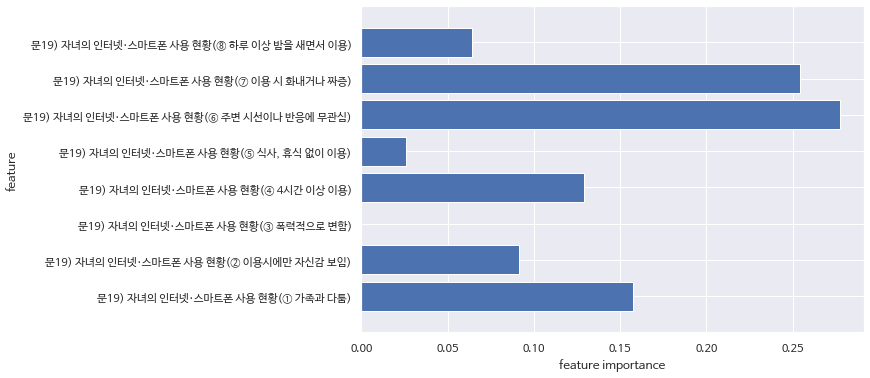

In [44]:
def plot_feature_importances_single(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(df0.columns[1:])   
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), df0.columns[1:])   
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) #Y 축 범위 지정 

##변수의 중요도 : 의사결정나무##

plot_feature_importances_single(tree)

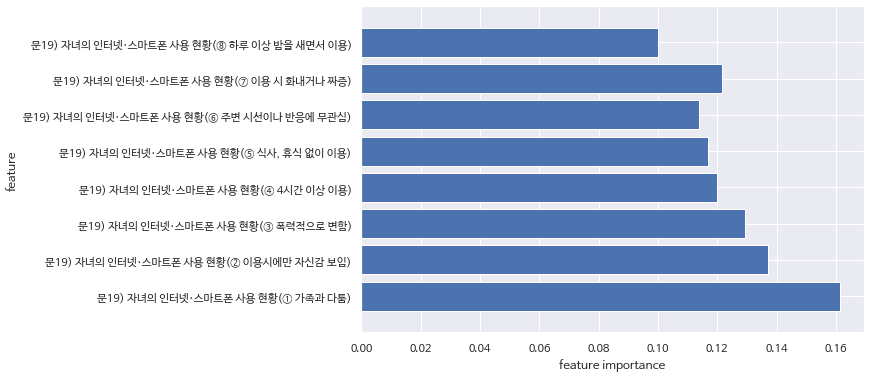

In [45]:
##변수의 중요도 : 랜덤 포레스트##

plot_feature_importances_single(forest)

Index(['문19) 자녀의 인터넷·스마트폰 사용 현황(① 가족과 다툼)',
       '문19) 자녀의 인터넷·스마트폰 사용 현황(② 이용시에만 자신감 보임)',
       '문19) 자녀의 인터넷·스마트폰 사용 현황(③ 폭력적으로 변함)',
       '문19) 자녀의 인터넷·스마트폰 사용 현황(④ 4시간 이상 이용)',
       '문19) 자녀의 인터넷·스마트폰 사용 현황(⑤ 식사, 휴식 없이 이용)',
       '문19) 자녀의 인터넷·스마트폰 사용 현황(⑥ 주변 시선이나 반응에 무관심)',
       '문19) 자녀의 인터넷·스마트폰 사용 현황(⑦ 이용 시 화내거나 짜증)',
       '문19) 자녀의 인터넷·스마트폰 사용 현황(⑧ 하루 이상 밤을 새면서 이용)'],
      dtype='object')
변수의 중요도:
 [0.19476966 0.06922367 0.01663917 0.16729153 0.06484063 0.25549087
 0.19674594 0.03499853]


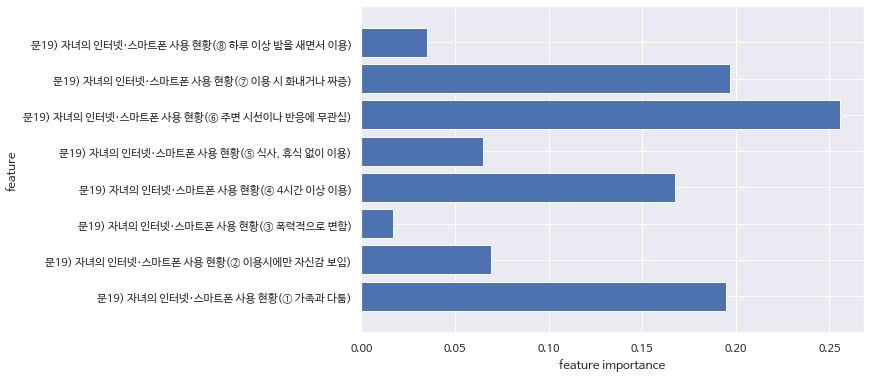

In [46]:

##변수의 중요도 : 그래디언트 부스트##

print(X.columns)
result = gbrt.feature_importances_
print("변수의 중요도:\n", result)

plot_feature_importances_single(gbrt)



Index(['문19) 자녀의 인터넷·스마트폰 사용 현황(① 가족과 다툼)',
       '문19) 자녀의 인터넷·스마트폰 사용 현황(② 이용시에만 자신감 보임)',
       '문19) 자녀의 인터넷·스마트폰 사용 현황(③ 폭력적으로 변함)',
       '문19) 자녀의 인터넷·스마트폰 사용 현황(④ 4시간 이상 이용)',
       '문19) 자녀의 인터넷·스마트폰 사용 현황(⑤ 식사, 휴식 없이 이용)',
       '문19) 자녀의 인터넷·스마트폰 사용 현황(⑥ 주변 시선이나 반응에 무관심)',
       '문19) 자녀의 인터넷·스마트폰 사용 현황(⑦ 이용 시 화내거나 짜증)',
       '문19) 자녀의 인터넷·스마트폰 사용 현황(⑧ 하루 이상 밤을 새면서 이용)'],
      dtype='object')
변수의 중요도:
 [0.12277655 0.09088113 0.10181852 0.14294608 0.12770604 0.14843847
 0.14610271 0.11933049]


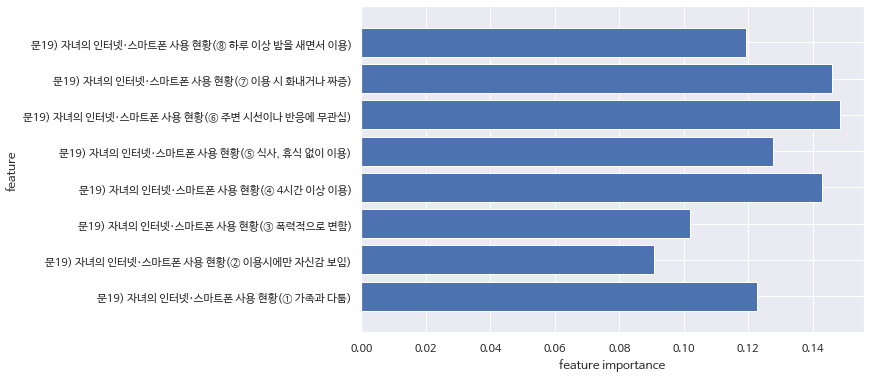

In [47]:
##변수의 중요도 : XG 부스트##

print(X.columns)
result = xgb.feature_importances_
print("변수의 중요도:\n", result)

plot_feature_importances_single(xgb)


### 우울

In [48]:
df0=df1.iloc[:,[0
               ,244,245,246,247,248,249,250,251,252]]

df0=df0.dropna()

X = df0.iloc[:, 1:]
y = df0.iloc[:, 0] 

print (len(X))



1398


In [49]:
print(df0.iloc[:,1].unique())


[2 1 3 4]


In [50]:
###의사결정나무
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# 데이터셋을 학습(train)과 테스트(test) 세트로 분할
#random_state : random 으로 분할시 사용되는 난수 seed 숫자
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=0)

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

tree= DecisionTreeClassifier(max_depth=4,random_state=0)  
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))


print(y_test.value_counts()) 


학습용 데이터 정확도: 0.614
시험용 데이터 정확도: 0.589
2    205
1    145
Name: 미취학&초등생 자녀가 평일 혼자 지내는 시간, dtype: int64


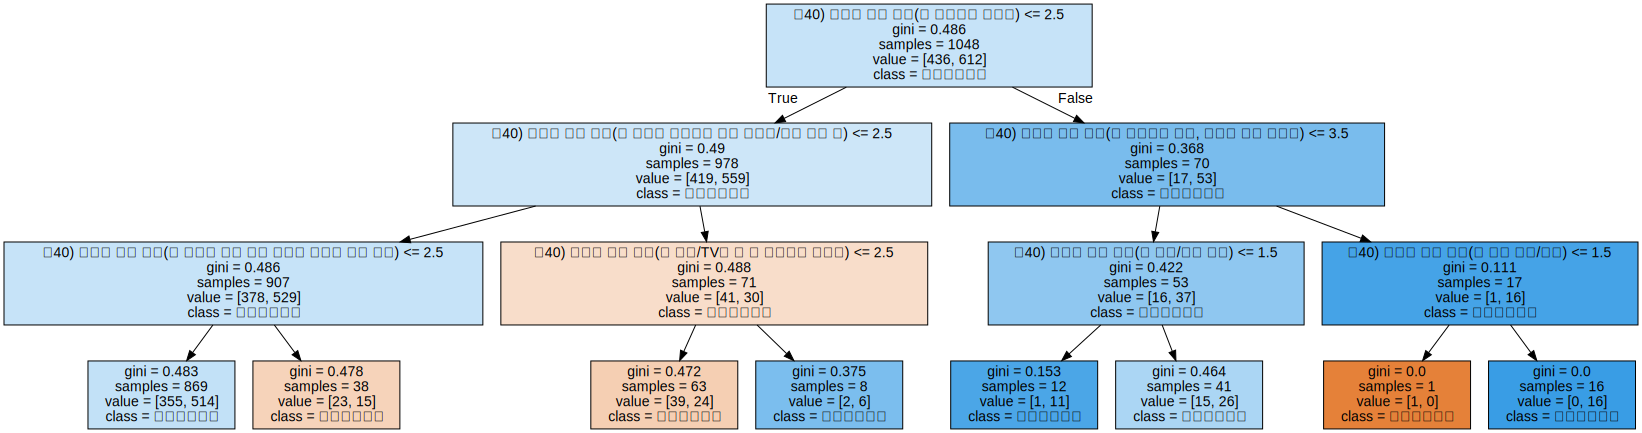

In [51]:
#graphviz 라이브러리를 이용하여 의사결정나무 그리기 
from sklearn.tree import export_graphviz
import graphviz

tree2 = DecisionTreeClassifier(max_depth=3,random_state=0)  
tree2.fit(X_train, y_train)

# filled = True: 색상의 진하기로 클래스를 나타냄, impurity: 불순도 계산값 보여주기 옵션
export_graphviz(tree2, out_file="tree.dot", class_names=["돌봄시간있음","돌봄시간없음" ],
                feature_names=df0.columns[1:], impurity=True, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))



In [52]:
###랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=30, random_state=0)
forest.fit(X_train, y_train)
print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.760
시험용 데이터 세트 정확도: 0.577


Accuracy
Decision tree:  [0.60952381 0.59047619 0.57142857 0.57142857 0.65714286 0.58095238
 0.59047619 0.57142857 0.57692308 0.57692308]
Random forest:  [0.55238095 0.59047619 0.57142857 0.55238095 0.62857143 0.53333333
 0.56190476 0.58095238 0.48076923 0.55769231]
Accuracy mean
Decision tree :0.590
Random forest :0.561


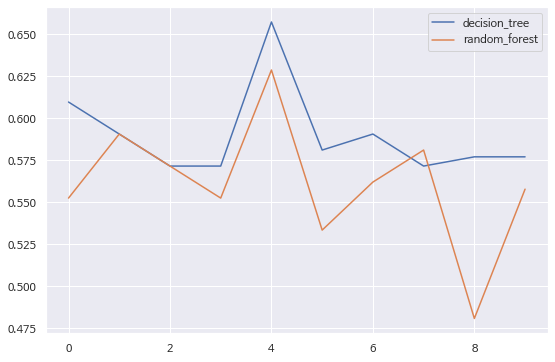

In [53]:
from sklearn.model_selection import cross_val_score

# 교차 검증을 10번 수행하여 10번의 교차 검증 평균 정확도를 비교 (10-fold cross validation)
# default cv=5

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 

cv_list = [    
            ['decision_tree',dt_scores],
            ['random_forest',rf_scores],
          ]
df = pd.DataFrame.from_dict(dict(cv_list))
df.plot()

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
# 기본값은 max_depth= 3, n_estimators=100, learning_rate = 0.1

gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)
print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))


gbrt = GradientBoostingClassifier(random_state=0,learning_rate=0.1)
gbrt.fit(X_train, y_train)
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))


학습 데이터 세트 정확도: 0.607
시험용 데이터 세트 정확도: 0.597
학습용 데이터 세트 정확도: 0.669
시험용 데이터 세트 정확도: 0.600


In [55]:

###그리드서치

from sklearn.model_selection import GridSearchCV

# 파라미터를 dictionary 형태로 설정
parameters = {'max_depth':[1,2,3], 'learning_rate':[0.1,0.08, 0.06, 0.04, 0.02]}

# param_grid의 파라미터들을 3개의 fold 로 나누어 검증
# refit=True (기본값): 가장 좋은 파라미터 설정으로 재학습  
init_gbrt = GradientBoostingClassifier(random_state=0)
grid_gbrt = GridSearchCV(init_gbrt, param_grid=parameters, cv=3, refit=True)
print(grid_gbrt)
# 파라미터들을 순차적으로 학습, 검증
grid_gbrt.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_gbrt.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]



GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.1, 0.08, 0.06, 0.04, 0.02],
                         'max_depth': [1, 2, 3]})


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'learning_rate': 0.1, 'max_depth': 1}",0.587777,4,0.597143,0.587393,0.578797
1,"{'learning_rate': 0.1, 'max_depth': 2}",0.577290,14,0.577143,0.595989,0.558739
2,"{'learning_rate': 0.1, 'max_depth': 3}",0.582060,11,0.582857,0.584527,0.578797
3,"{'learning_rate': 0.08, 'max_depth': 1}",0.583018,10,0.580000,0.590258,0.578797
4,"{'learning_rate': 0.08, 'max_depth': 2}",0.575388,15,0.568571,0.607450,0.550143
5,"{'learning_rate': 0.08, 'max_depth': 3}",0.580150,12,0.582857,0.584527,0.573066
6,"{'learning_rate': 0.06, 'max_depth': 1}",0.584928,7,0.580000,0.590258,0.584527
7,"{'learning_rate': 0.06, 'max_depth': 2}",0.586825,5,0.594286,0.601719,0.564470
8,"{'learning_rate': 0.06, 'max_depth': 3}",0.579198,13,0.580000,0.590258,0.567335
9,"{'learning_rate': 0.04, 'max_depth': 1}",0.587788,3,0.585714,0.590258,0.587393


In [56]:
print('GridSearchCV 최적 파라미터:', grid_gbrt.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_gbrt.best_score_))

# 최적 파라미터로 학습이 된 모델을 이용하여 시험용 데이터 세트 분류

print("학습용 데이터 세트 정확도: {:.3f}".format(grid_gbrt.score(X_train, y_train)))

print("시험용 데이터 세트 정확도: {:.3f}".format(grid_gbrt.score(X_test, y_test)))

GridSearchCV 최적 파라미터: {'learning_rate': 0.04, 'max_depth': 2}
GridSearchCV 최고 정확도: 0.5935
학습용 데이터 세트 정확도: 0.627
시험용 데이터 세트 정확도: 0.606


In [57]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3,random_state=0)
xgb.fit(X_train, y_train)
y_preds = xgb.predict(X_test)

#성능 평가
print("학습용 데이터 세트 정확도: {:.3f}".format(xgb.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(xgb.score(X_test, y_test)))


xgb_pred = xgb.predict(X_test)
print('XG boosting 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, xgb_pred)))
print(confusion_matrix(y_test, xgb_pred))



학습용 데이터 세트 정확도: 0.658
시험용 데이터 세트 정확도: 0.603
XG boosting 시험용 데이터 세트 정확도:0.603
[[ 30 115]
 [ 24 181]]


In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix 

print(y_test.value_counts()) 


tree= DecisionTreeClassifier(max_depth=5,random_state=0)  
tree.fit(X_train, y_train)


dt_pred = tree.predict(X_test)
rf_pred = forest.predict(X_test)
grid_gbrt_pred = grid_gbrt.predict(X_test)
gbrt_pred = gbrt.predict(X_test)
xgb_pred = xgb.predict(X_test)



# 예측 결과인 pred와 실제 결과인 y_test의 Confusion Matrix 출력

print('Decision tree 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, dt_pred)))
print(confusion_matrix(y_test, dt_pred))
print('Random forest 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, rf_pred)))
print(confusion_matrix(y_test, rf_pred))
print('Gradient boosting 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, gbrt_pred)))
print(confusion_matrix(y_test, gbrt_pred))
print('Gradient boosting(그리드서치) 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, grid_gbrt_pred)))
print(confusion_matrix(y_test, grid_gbrt_pred))
print('XG boosting 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, xgb_pred)))
print(confusion_matrix(y_test, xgb_pred))


2    205
1    145
Name: 미취학&초등생 자녀가 평일 혼자 지내는 시간, dtype: int64
Decision tree 시험용 데이터 세트 정확도:0.591
[[ 35 110]
 [ 33 172]]
Random forest 시험용 데이터 세트 정확도:0.577
[[ 49  96]
 [ 52 153]]
Gradient boosting 시험용 데이터 세트 정확도:0.600
[[ 32 113]
 [ 27 178]]
Gradient boosting(그리드서치) 시험용 데이터 세트 정확도:0.606
[[ 14 131]
 [  7 198]]
XG boosting 시험용 데이터 세트 정확도:0.603
[[ 30 115]
 [ 24 181]]


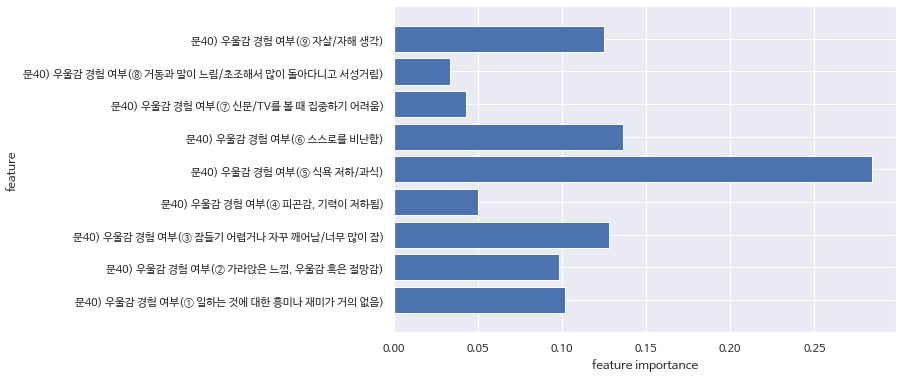

In [59]:
import numpy as np

def plot_feature_importances_single(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(df0.columns[1:])   
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), df0.columns[1:])   
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) #Y 축 범위 지정 

##변수의 중요도 : 의사결정나무##

plot_feature_importances_single(tree)


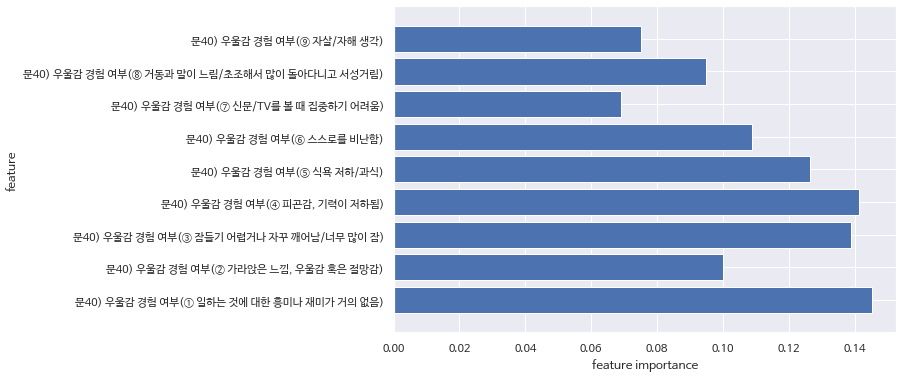

In [60]:
##변수의 중요도 : 핸덤포레스트##


plot_feature_importances_single(forest)


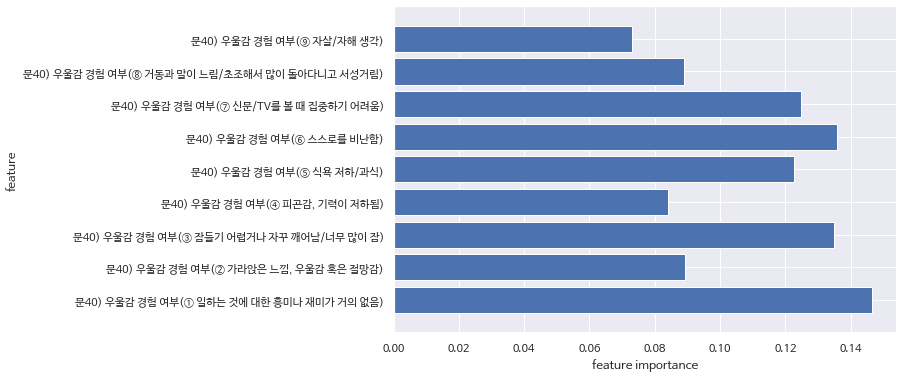

In [61]:
##변수의 중요도 : 그래디언트 부스트##

plot_feature_importances_single(gbrt)


Index(['문40) 우울감 경험 여부(① 일하는 것에 대한 흥미나 재미가 거의 없음)',
       '문40) 우울감 경험 여부(② 가라앉은 느낌, 우울감 혹은 절망감)',
       '문40) 우울감 경험 여부(③ 잠들기 어렵거나 자꾸 깨어남/너무 많이 잠)',
       '문40) 우울감 경험 여부(④ 피곤감, 기력이 저하됨)', '문40) 우울감 경험 여부(⑤ 식욕 저하/과식)',
       '문40) 우울감 경험 여부(⑥ 스스로를 비난함)', '문40) 우울감 경험 여부(⑦ 신문/TV를 볼 때 집중하기 어려움)',
       '문40) 우울감 경험 여부(⑧ 거동과 말이 느림/초조해서 많이 돌아다니고 서성거림)',
       '문40) 우울감 경험 여부(⑨ 자살/자해 생각)'],
      dtype='object')
변수의 중요도:
 [0.10843588 0.08255194 0.0872596  0.07820506 0.10734695 0.13876793
 0.12037487 0.17322727 0.10383052]


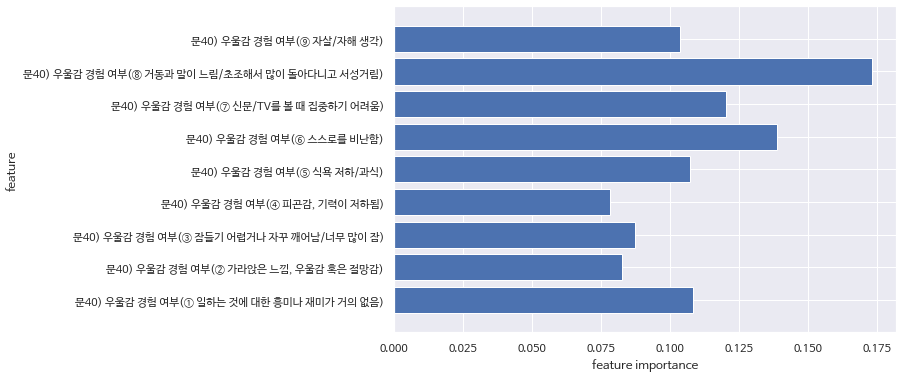

In [62]:

##변수의 중요도 : XG부스트##

print(X.columns)
result = xgb.feature_importances_
print("변수의 중요도:\n", result)

plot_feature_importances_single(xgb)
